# TP3

## Imports

In [1]:

import nltk
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
import networkx as nx
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hossam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hossam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hossam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Fonctions utilitaires (graphes clairs)

In [2]:

def extract_nouns_verbs(sentence):
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)
    nouns = [w for w, p in tagged if p.startswith('NN')]
    verbs = [w for w, p in tagged if p.startswith('VB')]
    return nouns, verbs

def show_synsets(word):
    synsets = wn.synsets(word)
    print(f"Synsets for '{word}':")
    for s in synsets:
        print(" ", s.name(), "-", s.definition())
    return synsets[0] if synsets else None

def add_relations(G, syn):
    for h in syn.hypernyms():
        G.add_edge(syn.name(), h.name(), relation="hypernym", color="red", style="solid")
    for h in syn.hyponyms():
        G.add_edge(syn.name(), h.name(), relation="hyponym", color="blue", style="dashed")
    for m in syn.part_meronyms():
        G.add_edge(syn.name(), m.name(), relation="meronym", color="green", style="dotted")

def draw_clear_graph(G, title):
    plt.figure(figsize=(18, 14))
    pos = nx.spring_layout(G, k=1.5, seed=42)

    edges = G.edges(data=True)
    colors = [e[2]["color"] for e in edges]
    styles = [e[2]["style"] for e in edges]

    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="#E6F2FF")
    nx.draw_networkx_labels(G, pos, font_size=9)

    for style in set(styles):
        styled_edges = [(u, v) for u, v, d in edges if d["style"] == style]
        styled_colors = [d["color"] for u, v, d in edges if d["style"] == style]
        nx.draw_networkx_edges(G, pos, edgelist=styled_edges,
                               edge_color=styled_colors, style=style, width=2)

    plt.title(title, fontsize=16)
    plt.axis("off")

    # Legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='red', lw=2, label='Hypernym (is-a)'),
        Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Hyponym'),
        Line2D([0], [0], color='green', lw=2, linestyle=':', label='Meronym (part-of)')
    ]
    plt.legend(handles=legend_elements, loc="upper left")
    plt.show()


## Exercice 1 – Graphe clair

In [3]:

sentence = "The cat chased the mouse in the garden."
nouns, verbs = extract_nouns_verbs(sentence)

print("Nouns:", nouns)
print("Verbs:", verbs)


Nouns: ['cat', 'mouse', 'garden']
Verbs: ['chased']


Synsets for 'cat':
  cat.n.01 - feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
  guy.n.01 - an informal term for a youth or man
  cat.n.03 - a spiteful woman gossip
  kat.n.01 - the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
  cat-o'-nine-tails.n.01 - a whip with nine knotted cords
  caterpillar.n.02 - a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
  big_cat.n.01 - any of several large cats typically able to roar and living in the wild
  computerized_tomography.n.01 - a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis
  cat.v.01 - beat with a cat-o'-nine-tails
  vomit.v.01 - eject the contents of the stomach through the mouth
Synsets for 'mouse':
  mouse.n.01 - any of numerous sma

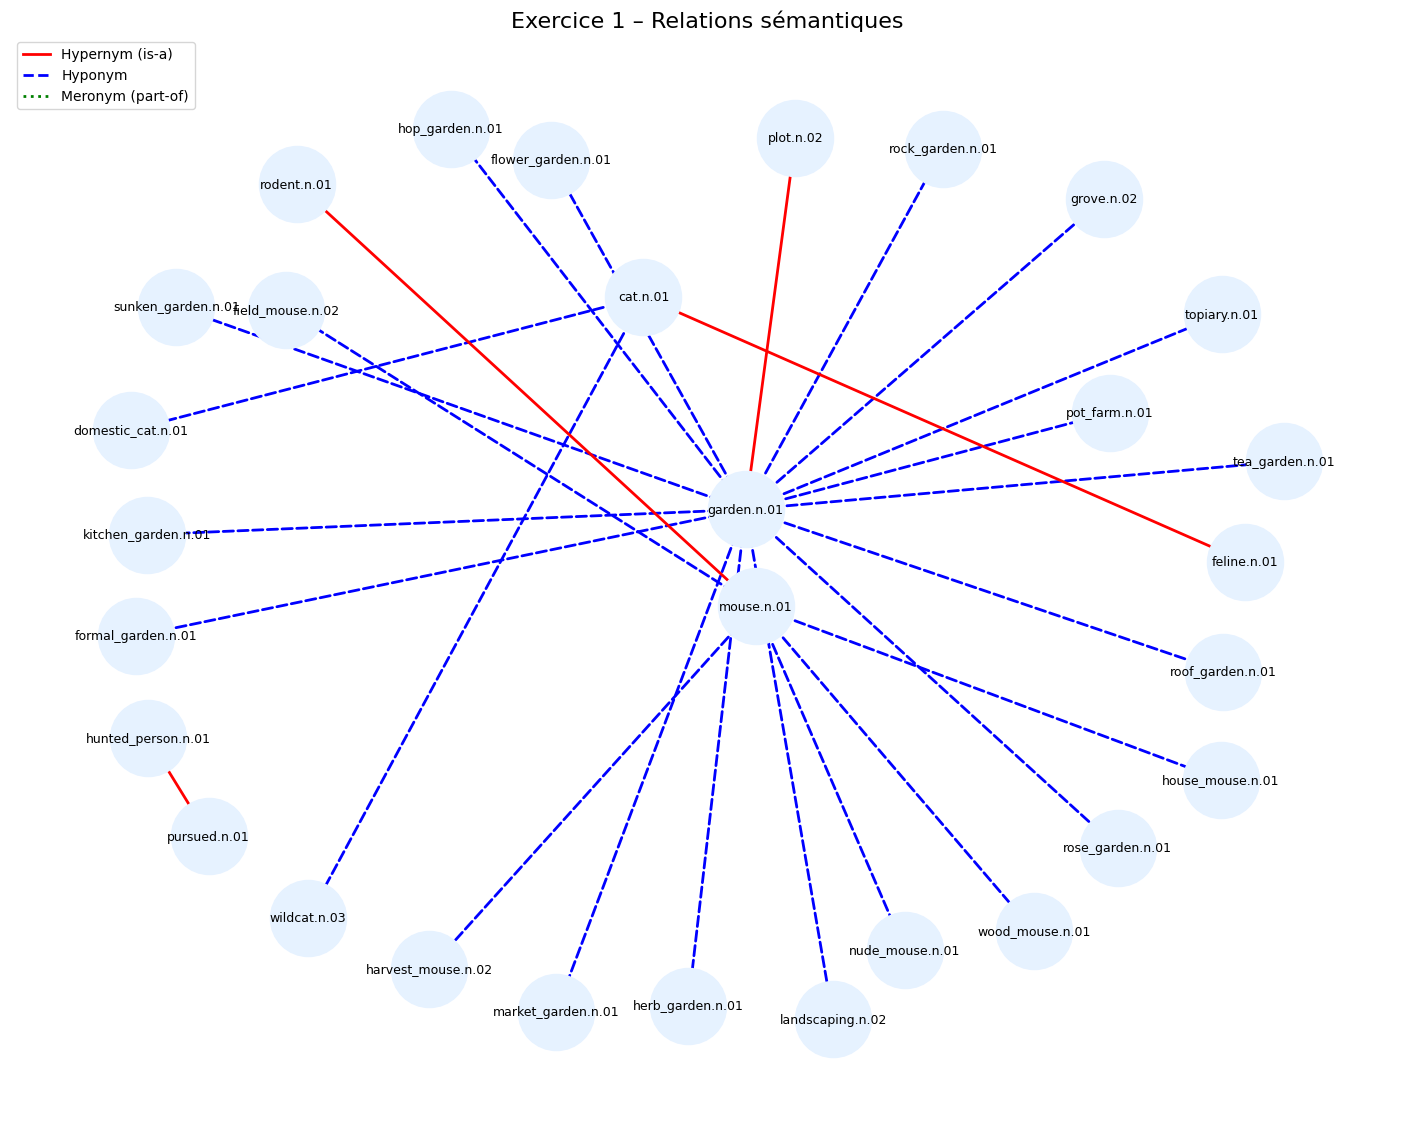

In [4]:
G = nx.DiGraph()

for w in nouns + verbs:
    syn = show_synsets(w)
    if syn:
        G.add_node(syn.name())
        add_relations(G, syn)

draw_clear_graph(G, "Exercice 1 – Relations sémantiques")

## Exercice 2 – Synonymes et relations

In [5]:

sentence = "The chef prepared a meal and served it to the guests."
nouns, verbs = extract_nouns_verbs(sentence)

print("Nouns:", nouns)
print("Verbs:", verbs)


Nouns: ['chef', 'meal', 'guests']
Verbs: ['prepared', 'served']


Synsets for 'chef':
  chef.n.01 - a professional cook
Synsets for 'meal':
  meal.n.01 - the food served and eaten at one time
  meal.n.02 - any of the occasions for eating food that occur by custom or habit at more or less fixed times
  meal.n.03 - coarsely ground foodstuff; especially seeds of various cereal grasses or pulse
Synsets for 'guests':
  guest.n.01 - a visitor to whom hospitality is extended
  guest.n.02 - United States journalist (born in England) noted for his syndicated homey verse (1881-1959)
  guest.n.03 - a customer of a hotel or restaurant etc.
  node.n.08 - (computer science) any computer that is hooked up to a computer network
Synsets for 'prepared':
  fix.v.12 - make ready or suitable or equip in advance for a particular purpose or for some use, event, etc
  cook.v.02 - prepare for eating by applying heat
  prepare.v.03 - to prepare verbally, either for written or spoken delivery
  organize.v.05 - arrange by systematic planning and united effort
  prepare.v.05 - e

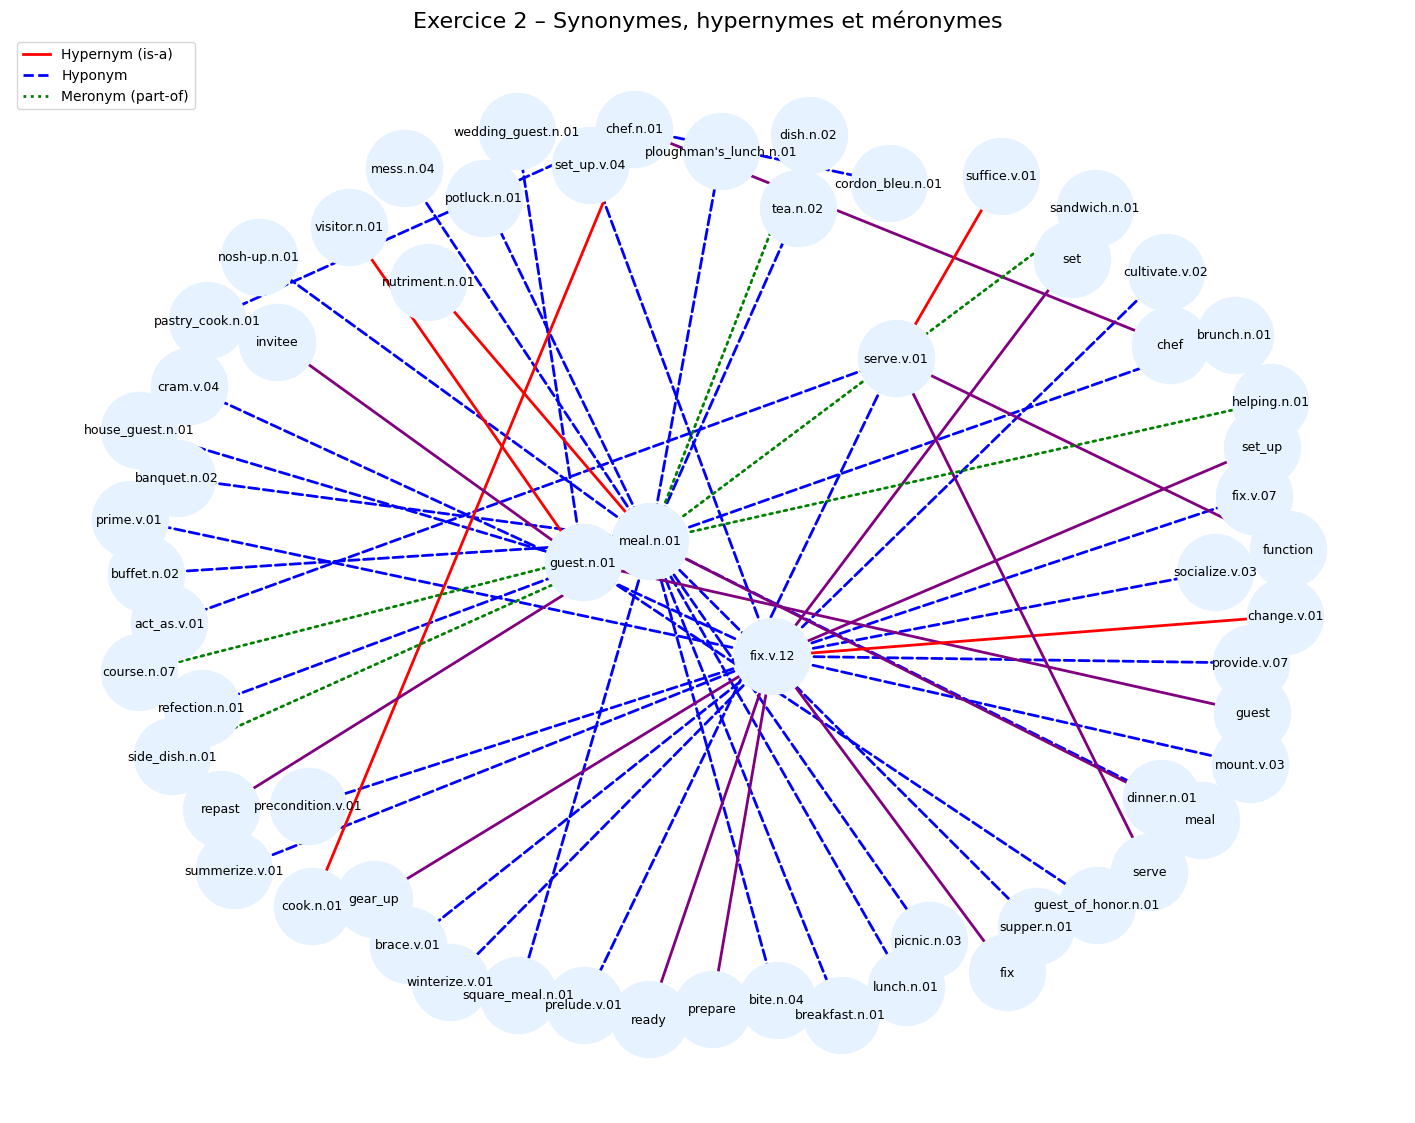

In [6]:
G = nx.DiGraph()

for w in nouns + verbs:
    syn = show_synsets(w)
    if syn:
        G.add_node(syn.name())
        for lemma in syn.lemmas():
            G.add_edge(syn.name(), lemma.name(), color="purple", style="solid", relation="synonym")
        add_relations(G, syn)

draw_clear_graph(G, "Exercice 2 – Synonymes, hypernymes et méronymes")

## Exercice 3 – Multi-phrases

In [7]:

sentences = [
    "Alice bought a laptop from the store.",
    "She used the laptop to write a report."
]

words = []
for s in sentences:
    n, v = extract_nouns_verbs(s)
    words.extend(n + v)

print("Words: ",words)


Words:  ['Alice', 'laptop', 'store', 'bought', 'laptop', 'report', 'used', 'write']


Synsets for 'laptop':
  laptop.n.01 - a portable computer small enough to use in your lap
Synsets for 'report':
  report.n.01 - a written document describing the findings of some individual or group
  report.n.02 - the act of informing by verbal report
  report.n.03 - a short account of the news
  report.n.04 - a sharp explosive sound (especially the sound of a gun firing)
  report_card.n.01 - a written evaluation of a student's scholarship and deportment
  composition.n.08 - an essay (especially one written as an assignment)
  reputation.n.03 - the general estimation that the public has for a person
  report.v.01 - to give an account or representation of in words
  report.v.02 - announce as the result of an investigation or experience or finding
  report.v.03 - announce one's presence
  report.v.04 - make known to the authorities
  report.v.05 - be responsible for reporting the details of, as in journalism
  report.v.06 - complain about; make a charge against
Synsets for 'used':
  use

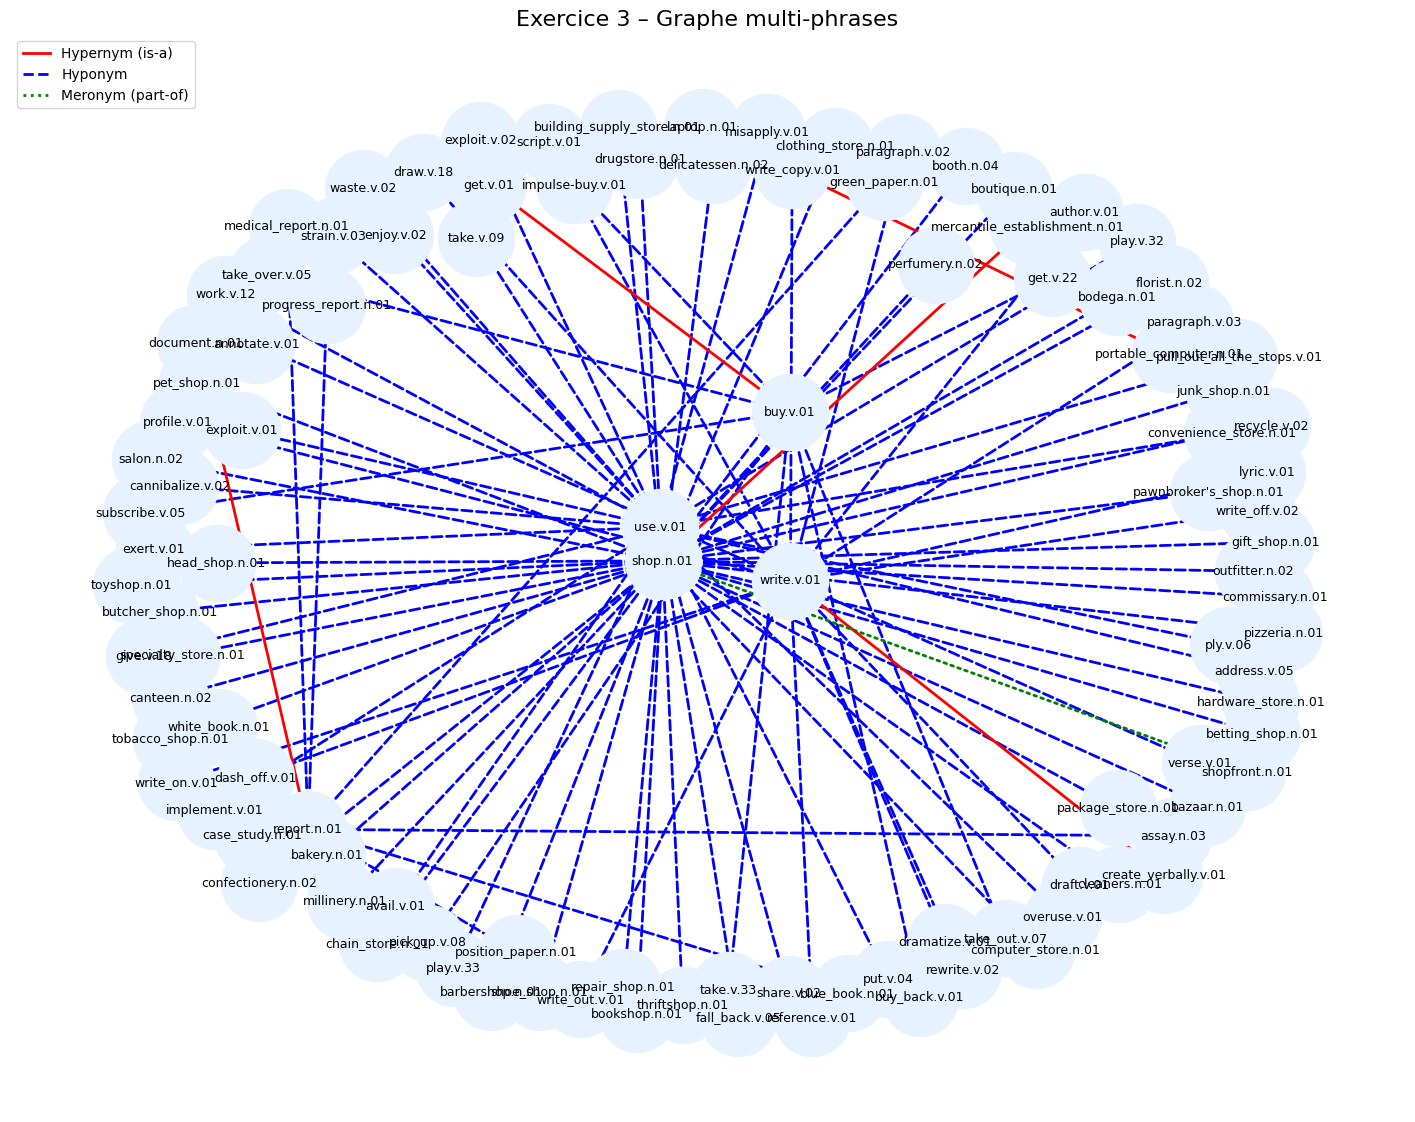

In [8]:
G = nx.DiGraph()

for w in set(words):
    syn = show_synsets(w)
    if syn:
        G.add_node(syn.name())
        add_relations(G, syn)

draw_clear_graph(G, "Exercice 3 – Graphe multi-phrases")

## Exercice 4 – Graphe coloré et lisible

Synsets for 'car':
  car.n.01 - a motor vehicle with four wheels; usually propelled by an internal combustion engine
  car.n.02 - a wheeled vehicle adapted to the rails of railroad
  car.n.03 - the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
  car.n.04 - where passengers ride up and down
  cable_car.n.01 - a conveyance for passengers or freight on a cable railway
Synsets for 'bus':
  bus.n.01 - a vehicle carrying many passengers; used for public transport
  bus_topology.n.01 - the topology of a network whose components are connected by a busbar
  busbar.n.01 - an electrical conductor that makes a common connection between several circuits
  bus.n.04 - a car that is old and unreliable
  bus.v.01 - send or move around by bus
  bus.v.02 - ride in a bus
  bus.v.03 - remove used dishes from the table in restaurants
Synsets for 'bicycle':
  bicycle.n.01 - a wheeled vehicle that has two wheels and is moved by foot pedals
  bicycle

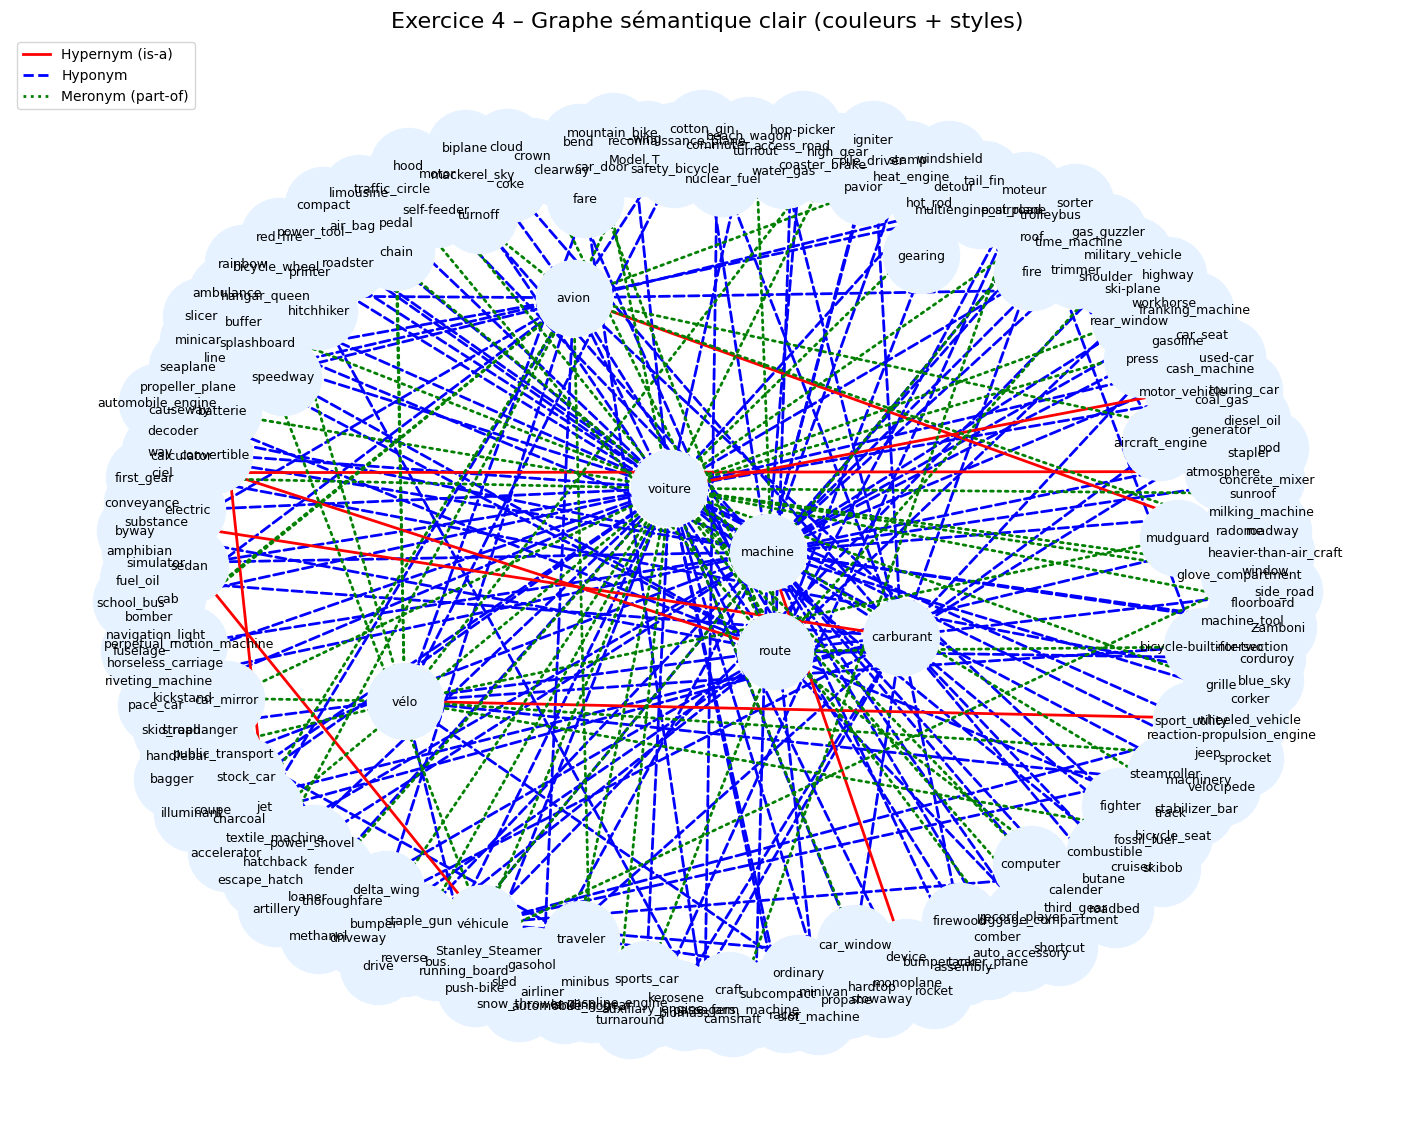

In [9]:

mapping = {
    "voiture": "car",
    "bus": "bus",
    "vélo": "bicycle",
    "véhicule": "vehicle",
    "machine": "machine",
    "moteur": "engine",
    "batterie": "battery",
    "carburant": "fuel",
    "passagers": "passenger",
    "route": "road",
    "avion": "airplane",
    "ciel": "sky"
}

G = nx.DiGraph()

for fr, en in mapping.items():
    syn = show_synsets(en)
    if syn:
        G.add_node(fr)
        for h in syn.hypernyms():
            G.add_edge(fr, h.lemmas()[0].name(), color="red", style="solid", relation="hypernym")
        for h in syn.hyponyms():
            G.add_edge(fr, h.lemmas()[0].name(), color="blue", style="dashed", relation="hyponym")
        for m in syn.part_meronyms():
            G.add_edge(fr, m.lemmas()[0].name(), color="green", style="dotted", relation="meronym")

draw_clear_graph(G, "Exercice 4 – Graphe sémantique clair (couleurs + styles)")
